<a href="https://colab.research.google.com/github/L-Shyamal/ear-echo/blob/main/Ear_Echo/Ear_Echo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import csv
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#reading data from the stored CSV file
TF_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data.csv')
TF_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,711,712,713,714,715,716,717,718,719,720
0,-1.758732,-1.316233,-1.448481,-1.164817,-2.013474,-2.223856,-1.159653,-1.998076,-2.130880,-2.295564,...,-5.254242,-4.896672,-4.488895,-4.717559,-4.252572,-3.803206,-3.776796,-3.924319,-3.936150,0
1,-2.429495,-1.386064,-1.790867,-1.762845,-2.503155,-2.510107,-1.616601,-2.483482,-2.450783,-2.296140,...,-1.979857,-1.768338,-1.986087,-1.908660,-1.897203,-2.050830,-1.589206,-1.705800,-1.926035,1
2,-10.338028,-9.470236,-7.670192,-6.950148,-13.228057,-11.314719,-6.990939,-8.856706,-8.495282,-7.931567,...,0.277463,0.224641,0.310114,0.409619,0.568201,0.626434,0.715323,0.634318,0.729919,2
3,-8.763782,-5.564870,-6.403053,-5.828505,-8.711662,-8.220575,-5.632420,-8.655699,-9.071031,-8.115241,...,-3.311830,-3.629605,-3.395198,-3.679858,-3.407436,-3.397109,-3.141086,-3.530567,-3.707720,3
4,-2.898530,-2.768876,-2.704775,-2.683466,-3.509124,-3.475614,-2.573483,-2.967676,-3.749368,-3.526382,...,-3.245148,-3.134532,-2.813092,-2.755297,-2.798699,-2.500977,-2.347744,-2.559068,-2.397679,0


In [ ]:
# Seperating Data and Labels

#print(TF_data['720'].value_counts())

#TF_data.drop(TF_data[TF_data['720'] >= 2].index, inplace = True)
print(TF_data['720'].value_counts())

# Seperating Data and Labels

X = TF_data.drop(columns='720',axis=1)
Y = TF_data['720']

X_check , Y_check = X[140:] ,Y[140:]
X,Y = X[:142] , Y[:142]

# Train and Test Data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y , test_size=0.15 ,stratify=Y, random_state=0)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("# of training data =",X_train.shape[0])
print("# of testdata =",X_test.shape[0])
print(X_check.shape[0])

0    37
1    37
2    37
3    37
Name: 720, dtype: int64
# of training data = 120
# of testdata = 22
8


In [ ]:


model = Sequential()
model.add(tf.keras.layers.Dense(720, activation='relu', input_shape=(720,)))
model.add(tf.keras.layers.Dense(250, activation='relu'))
model.add(tf.keras.layers.Dense(120, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

print("Training Run")
# compile model
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.06)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train,Y_train, epochs=500, batch_size=16)


print("\n"*5)
print("Test Run")

loss, accuracy = model.evaluate(X_test,Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Training Run
Epoch 1/500
7/7 [==============================] - 1s 4ms/step - loss: 1.7093 - accuracy: 0.2095
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 1.3422 - accuracy: 0.3524
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 1.2040 - accuracy: 0.4000
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 1.1043 - accuracy: 0.5333
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 1.0128 - accuracy: 0.6190
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 0.9592 - accuracy: 0.6095
Epoch 7/500
7/7 [==============================] - 0s 4ms/step - loss: 0.9582 - accuracy: 0.6667
Epoch 8/500
7/7 [==============================] - 0s 4ms/step - loss: 0.8759 - accuracy: 0.7524
Epoch 9/500
7/7 [==============================] - 0s 4ms/step - loss: 0.8397 - accuracy: 0.7143
Epoch 10/500
7/7 [==============================] - 0s 4ms/step - loss: 0.8055 - accuracy: 0.7810
Epoch 11/500
7/7

In [ ]:
#model.save('/content/drive/MyDrive/Ear Echo/TF model')

1/1 [==============================] - 0s 26ms/step - loss: 0.0438 - accuracy: 1.0000


(0.0, 1.1)

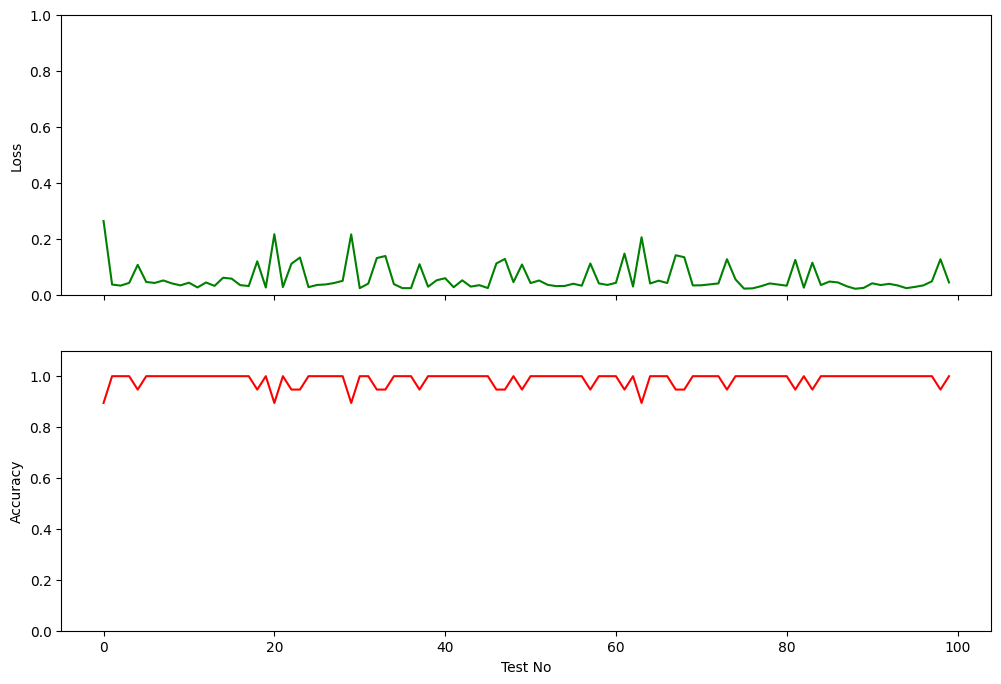

In [ ]:
TestSet = []
for t in range(100):
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y , test_size=0.15 ,stratify=Y, random_state=t)

  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')

  loss, accuracy = model.evaluate(X_test,Y_test)
  TestSet.append((t,loss,accuracy))


res = np.array(TestSet).T
fig, axs = plt.subplots(2, 1,figsize=(12,8), sharex=True)

axs[0].plot(res[0],res[1],color='green')
axs[0].set_ylabel("Loss")
axs[0].set_ylim(0,1)

axs[1].plot(res[0],res[2],color='red')
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("Test No")
axs[1].set_ylim(0,1.1)

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Ear Echo/TF model')
new_model.evaluate(X_check,Y_check)

1/1 [==============================] - 0s 127ms/step - loss: 0.6674 - accuracy: 0.7500


[0.6673921346664429, 0.75]